# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        city = city.capitalize()
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
i = 1

# Set base URL for openweather API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Empty list to hold temperature, humidity, cloudiness, latitude, wind speed
temp = []
humidity = []
cloudiness = []
latitude = []
longitude = []
wind_speed = []

# Loop to iterate through each city in cities list and call API for each
for city in cities:
    print(f'Processing Record {i} | {city}')
    try:
        response = requests.get(f"{base_url}appid={weather_api_key}&units={units}&q={city}").json()
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
    # if there is an error, print error statement and append nan value
    except:    
        print(f'City not found. Skipping...')
        temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        wind_speed.append(np.nan)
    
    i += 1



rd 956 | Lebu
Processing Record 957 | Saint-pierre
Processing Record 958 | East london
Processing Record 959 | Hobart
Processing Record 960 | Waingapu
Processing Record 961 | Hilo
Processing Record 962 | Attawapiskat
City not found. Skipping...
Processing Record 963 | Ushuaia
Processing Record 964 | Hobart
Processing Record 965 | Panlaitan
Processing Record 966 | Rikitea
Processing Record 967 | Sarbi
City not found. Skipping...
Processing Record 968 | Geraldton
Processing Record 969 | Busselton
Processing Record 970 | Ngunguru
Processing Record 971 | La ronge
Processing Record 972 | Leningradskiy
Processing Record 973 | Severo-kurilsk
Processing Record 974 | Komsomolskiy
Processing Record 975 | Ushuaia
Processing Record 976 | Bambous virieux
Processing Record 977 | Jiayuguan
Processing Record 978 | Illoqqortoormiut
City not found. Skipping...
Processing Record 979 | Popondetta
Processing Record 980 | Sibu
Processing Record 981 | Conceicao do araguaia
Processing Record 982 | Buraydah
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({
    'City' : cities,
    'Temperature' : temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Latitude' : latitude,
    'Longitude' : longitude,
    'Wind Speed' : wind_speed
})

weather_df.to_csv(output_data_file)

In [7]:
weather_df

,City,Temperature,Humidity,Cloudiness,Latitude,Longitude,Wind Speed
0,Santa cruz de la palma,17.64,77.0,0.0,28.68,-17.76,4.10
1,Umzimvubu,NaN,NaN,NaN,NaN,NaN,NaN
2,Kapaa,25.85,65.0,40.0,22.08,-159.32,8.20
3,Ushuaia,6.00,81.0,75.0,-54.80,-68.30,11.80
4,Faanui,27.98,70.0,37.0,-16.48,-151.75,1.03
...,...,...,...,...,...,...,...
1495,Kavieng,29.26,71.0,28.0,-2.57,150.80,3.52
1496,Quatre cocos,24.23,64.0,20.0,-20.21,57.76,7.20
1497,Avarua,26.00,65.0,95.0,-21.21,-159.78,3.60
1498,Butaritari,28.65,80.0,52.0,3.07,172.79,7.96


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

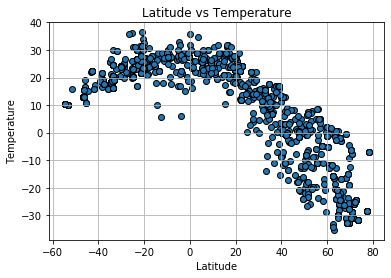

In [38]:
# Function because i'm lazy
def gimme_that_data(feature, label):
    # format string so I don't have to input correct capitalizations into function
    feature = f'{feature}'.lower().title()
    label = f'{label}'.lower().title()
    
    # Make the plot along with formating. Save figure at the end
    plt.scatter(weather_df[feature], weather_df[label], edgecolor = 'black')
    plt.xlabel(feature)
    plt.ylabel(label)
    plt.grid(b=True)
    plt.title(f'{feature} vs {label}')
    plt.savefig(f'output_data/{feature} vs {label}.png')

gimme_that_data('latitude', 'temperature')


The above cell compares the temperature and latitude for 1500 cities as called by the OpenWeather API on January 28th, 2020. It shows that temperature is generally highest around the equator (0 latitude) and lowest in far northern hemisphere (as expected for January).

#### Latitude vs. Humidity Plot

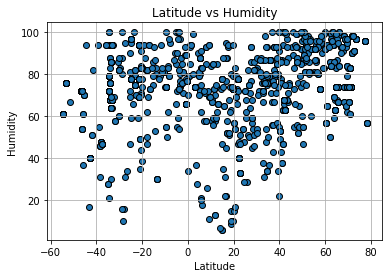

In [39]:
gimme_that_data('latitude', 'humidity')

The above cell compares the % humidity and latitude for 1500 cities as called by the OpenWeather API on January 28th, 2020. There does not seem to be any general correlation between latitude and humidity, but most cities seem to be above 60% humidity. 

#### Latitude vs. Cloudiness Plot

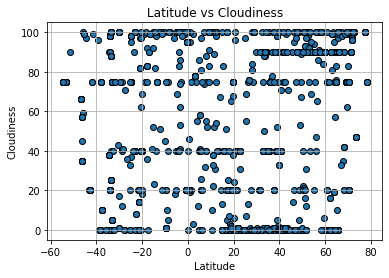

In [40]:
gimme_that_data('latitude', 'cloudiness')

The above cell compares the % cloudiness and latitude for 1500 cities as called by the OpenWeather API on January 28th, 2020. While there doesn't seem to be any correlation, the value for cloudiness almost seems quantized to percentages that are multiples of 20 (possibly an artifact of the data collection).

#### Latitude vs. Wind Speed Plot

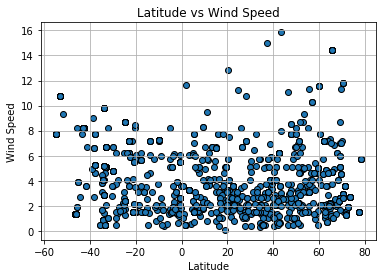

In [41]:
gimme_that_data('latitude', 'wind speed')

The above cell compares the wind speed (km/h) and latitude for 1500 cities as called by the OpenWeather API on January 28th, 2020. There does not seem to be any correlation but the mean wind speed seems to be between 2 and 4 km/h.

## Linear Regression

In [69]:
# OPTIONAL: Create a function to create Linear Regression plots
def gimme_that_line(x, y, hemi):
    #set x and y values for regression along with minor string formatting
    if hemi == 'northern':
        df = northern_hem_df
        globe = 'Northern Hemisphere'
    elif hemi == 'southern':
        df = southern_hem_df
        globe = 'Southern Hemisphere'
    feature = x.lower().title()
    label = y.lower().title()
    x_values = df[feature]
    y_values = df[label]
    
    #run the linregress function from scipy and create regress_values from the outputs
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #GRAPH IT 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,(0,0),fontsize=15,color="red")
    plt.xlabel(f'{feature}')
    plt.ylabel(f'{label}')
    plt.title(f'{feature} vs {label} in the {globe}')
    plt.show()
    print(line_eq)
    print(f'The r squared value is {rvalue}')

In [49]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = weather_df.loc[weather_df['Latitude'] >= 0, :]
southern_hem_df = weather_df.loc[weather_df['Latitude'] < 0, :]

northern_hem_df = northern_hem_df.dropna()
southern_hem_df = southern_hem_df.dropna()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

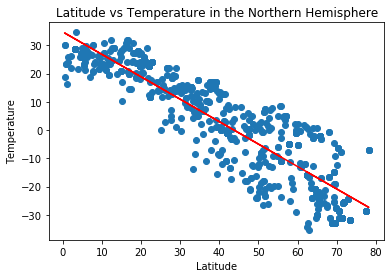

y = -0.79x + 34.8
The r squared value is -0.9006971505645764


In [70]:
gimme_that_line('latitude', 'temperature', hemi = 'northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

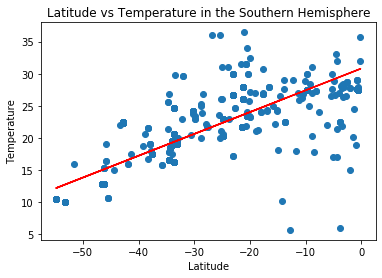

y = 0.34x + 30.8
The r squared value is 0.8174503205252075


In [71]:
gimme_that_line('latitude', 'temperature', hemi = 'southern')

For cities in the northern hemisphere, latitude is positively correlated with temperature. The southern hemisphere has a negative correlation instead, and both of these correlations are quite strong. This seems to make sense as cities closer to the equater are generally hotter.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

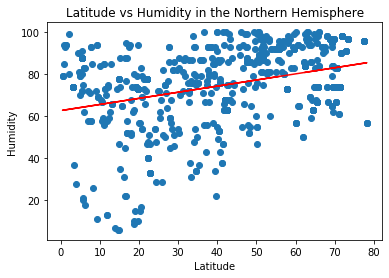

y = 0.29x + 62.74
The r squared value is 0.34061674751292054


In [72]:
gimme_that_line('latitude', 'humidity', hemi = 'northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

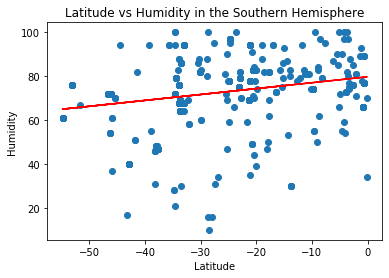

y = 0.27x + 79.72
The r squared value is 0.2811643155454472


In [73]:
gimme_that_line('latitude', 'humidity', hemi = 'southern')

For both hemispheres there is a weak positive correlation between increasing latitude and % humidity, suggesting that the minimum humidity goes up as you move farther north.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

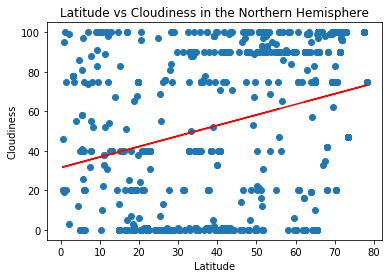

y = 0.53x + 31.5
The r squared value is 0.2892368344556243


In [74]:
gimme_that_line('latitude', 'cloudiness', hemi = 'northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

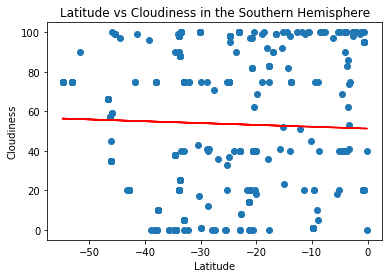

y = -0.09x + 51.27
The r squared value is -0.04071989817699403


In [78]:
gimme_that_line('latitude', 'cloudiness', hemi = 'southern')

There does not seem to be any correlation between latitude and % cloudiness. I am assuming that cloudiness has more do to with proximity to bodies of water, which is not necessarily dependent on distance from the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

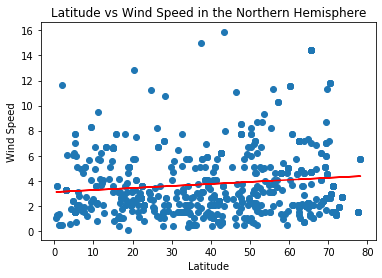

y = 0.02x + 3.1
The r squared value is 0.1304525731188511


In [76]:
gimme_that_line('latitude', 'wind speed', hemi = 'northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

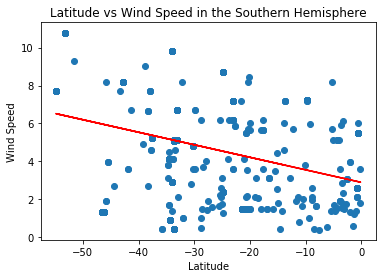

y = -0.07x + 2.89
The r squared value is -0.33849678077328876


In [77]:
gimme_that_line('latitude', 'wind speed', hemi = 'southern')

Only the southern hemisphere seems to have even a slight [negative] correlation between latitude and wind speed. It seems like the lowest wind speed is at the equator.